In [1]:
import numpy as np
import pandas as pd
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
%run ../src/acc_df.py

In [3]:
Ac = Acc_data('../data/cleaned/coll_coord.csv')

/Users/franzmornau/g92dsi/capstone/Traffic-Accident-Hotspots-and-Patterns/src/acc_df.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['ds']=X.ds.apply(lambda x: pd.to_datetime(x))


#### Dummyfied data by week (calendar weeks)

In [5]:
week_d = Ac.get_weekly_cw_dummyfied(2004,2019)
week_d.tail(2)

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,acc_nr,has_holiday,week_mean,year_red
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,141,0,257.1250,15
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,235.5625,15


In [7]:
# X=acc_ds[['year','month','week','day','weekday']]
X = week_d.drop(['acc_nr'], axis=1)
y = week_d['acc_nr']

In [8]:
X_train= X[X['year_red']<15]
X_test= X[X['year_red']==15]
y_train= y[X['year_red']<15]
y_test = y[X['year_red']==15]

In [9]:
model = GradientBoostingRegressor(learning_rate=0.001, 
                                  n_estimators=5000, #boosting stages to perform
                                  max_depth=3)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

In [10]:
model.feature_importances_

array([1.46998842e-02, 1.40121547e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.95598238e-04,
       1.38590745e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.41185578e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.22438258e-04,
       1.45665614e-04, 4.89122102e-04, 3.39801941e-04, 0.00000000e+00,
       1.40375601e-04, 6.02202289e-04, 6.23019273e-04, 0.00000000e+00,
       4.27962364e-04, 0.00000000e+00, 9.34745408e-06, 0.00000000e+00,
       0.00000000e+00, 1.76800640e-05, 0.00000000e+00, 0.00000000e+00,
       2.68121148e-05, 7.38307671e-05, 0.00000000e+00, 0.00000000e+00,
       2.14929533e-03, 9.86607051e-04, 2.41328201e-04, 4.29240569e-03,
       0.00000000e+00, 4.40578440e-04, 7.56829618e-03, 1.65472940e-03,
       7.43241953e-04, 2.88950371e-04, 1.82800431e-03, 1.60989201e-03,
       3.20306071e-02, 2.75580537e-02, 3.44227068e-01, 5.54387054e-01])

In [11]:
model.score(X_train,y_train)

0.6553715561616917

In [12]:
model.score(X_test,y_test)

-1.3574042287870296

In [17]:
y_hat

array([216.65471002, 240.31194649, 219.09598435, 204.2690237 ,
       227.88654582, 226.13523155, 218.83143843, 202.23286392,
       236.20427874, 228.6606878 , 228.6606878 , 219.09598435,
       230.0997695 , 225.49064119, 224.65690273, 226.13523155,
       225.18231286, 237.61596956, 233.43846761, 235.3674516 ,
       226.28381185])

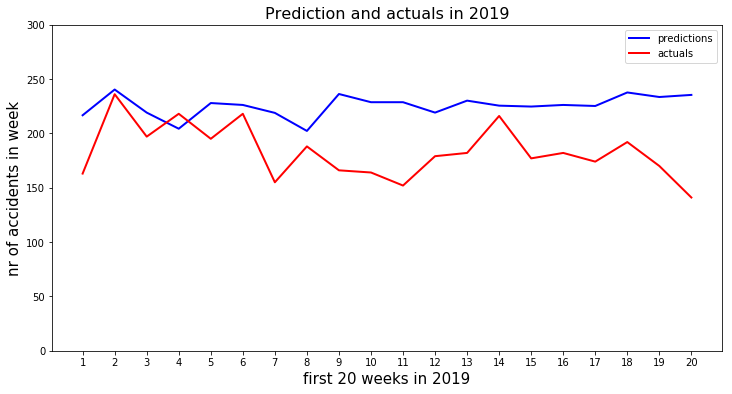

In [21]:
x=range(1,21)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y_hat[:20], 'b-', label='predictions', lw=2)

ax.plot(x,y_test[:20], 'r-', label='actuals', lw=2)
# ax.plot(x,y_base_19, 'g-', label='baseline', lw=0.8)
ax.set_xticks(x)
ax.set_xlabel('first 20 weeks in 2019', fontsize=15)
ax.set_ylabel('nr of accidents in week', fontsize=15)
ax.set_ylim(0,300)
ax.set_title('Prediction and actuals in 2019', fontsize=16)
ax.legend()

In [22]:
y_act_18 = y_train[-52:]
y_base_19 = [y_act_18.mean()]*20

In [25]:
from sklearn.metrics import mean_squared_error
print('MSE to actuals:', mean_squared_error(y_hat,y_test))
print('MSE to baseline:', mean_squared_error(y_base_19, y_test[:20]))

MSE to actuals: 4705.357458307631
MSE to baseline: 2646.043417159765


In [13]:
y_18 = model.predict(X_test)
x = X_test.index.values
holiday_weeks=x[X_test['holiday']==1]

KeyError: 'holiday'

NameError: name 'holiday_weeks' is not defined

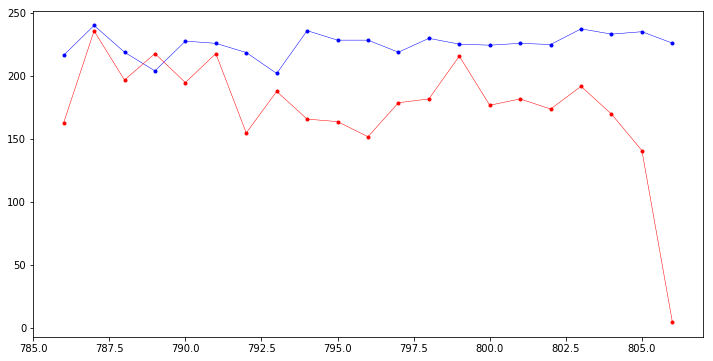

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y_18, 'b.-', label='predictions', lw=0.5)
ax.plot(x,y_test, 'r.-', label='actuals', lw=0.5)
for h in holiday_weeks:
    plt.axvline(x=h)
ax.set_ylim(0,300)
ax.legend()